# 使用 MNIST 資料集進行影像分類

由 70,000 張從 0 到 9 手寫數字灰階影像組成的 [MNSIT 資料集](http://yann.lecun.com/exdb/mnist/)能夠實現準確的影像分類

In [58]:
from tensorflow.keras.datasets import mnist

有了 `mnist`模組，我們能輕鬆載入 MNIST 資料，且資料已分割成影像和標籤，可用於訓練與驗證：

In [59]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## 探索 MNIST 資料

In [60]:
x_train.shape

(60000, 28, 28)

In [61]:
x_valid.shape

(10000, 28, 28)

可以看到這些 28x28 影像的呈現方式為一系列介於 0 到 255 的 8 bits unsinged integer (正整數值)，這些值對應到像素的灰階值，其中 `0`代表黑色，`255` 代表白色，其他所有值都介於兩者之間：

In [62]:
x_train.dtype

dtype('uint8')

In [63]:
x_train.min()

0

In [64]:
x_train.max()

255

In [65]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

我們可以使用 [Matplotlib](https://matplotlib.org/) 在資料集中，視覺化出其中一張灰階影像：

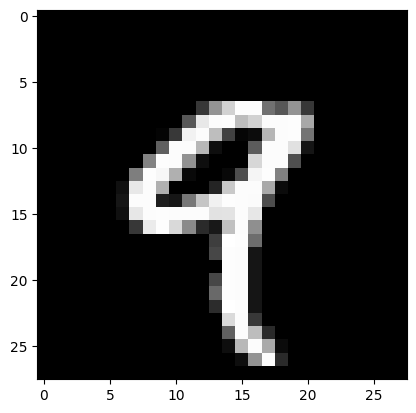

In [66]:
import matplotlib.pyplot as plt

image = x_train[4]
plt.imshow(image, cmap='gray')

可以看到這是一張值為 9 的 28x28 像素影像

In [67]:
y_train[4]

9

## 準備資料以進行訓練

雖然深度學習模型可以接受 2 維影像 (例子中為 28x28 像素)，還是會簡化最初用到的資料，將每張影像重新調整為 784 連續像素的單一陣列 (28x28 = 784)。也就是扁平化 (Flatten) 影像

In [68]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

我們可以確認影像資料已經過重新調整，現在是一系列各自包含 784 像素值的 1D 陣列：

In [69]:
x_train.shape

(60000, 784)

In [70]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### 正規化影像資料

In [71]:
x_train = x_train / 255
x_valid = x_valid / 255

現在我們可以看到這些值都是介於 `0.0`和 `1.0` 的浮點值：

In [72]:
x_train.dtype

dtype('float64')

In [73]:
x_train.min()

0.0

In [74]:
x_train.max()

1.0

### 對標籤進行分類編碼

Keras 提供的公用程式可以對值進行分類編碼

In [75]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

以下是訓練標籤的前 10 個值

In [76]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 建立模型

In [77]:
from tensorflow.keras.models import Sequential

model = Sequential()

## **模型建置相關方法嘗試**

In [86]:
#使用tensorflow
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
img=x_train[0]
num_classes=len(y_train[0])
#先把影像大小跟正確答案列印出來
print(img.shape,len(y_train[0]))

(784,) 10


In [87]:
# Model 1 使用Sequential
img_size=img.shape[0]
model=models.Sequential()

#使特徵慢慢縮減
model.add(layers.Dense(units=512,activation='relu',input_shape=(img.shape)))
model.add(layers.Dense(units=20))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

In [88]:
# Model 2 使用layers
inputs=layers.Input(shape=(img.shape))
#縮減特徵
x=layers.Dense(units=512,activation='relu')(inputs)
x=layers.Dense(20,activation=activations.relu)(x)
prediction=layers.Dense(num_classes,activation='softmax')(x)
model2=models.Model(inputs=inputs,outputs=prediction)

In [89]:
# Model 3 使用models.Sequential方式一整個串起來，使用陣列做串接
model3=models.Sequential([layers.Dense(units=512,activation='relu',input_shape=(img.shape)),
                          layers.Dense(units=256),
                          layers.Activation('relu'),
                          layers.Dense(num_classes,activation='softmax')
])

In [90]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 20)                  │          10,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,390 (1.57 MB)

 Trainable params: 412,390 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

### 建立輸入層

In [78]:
from tensorflow.keras.layers import Dense

In [79]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### 建立隱藏層

In [80]:
model.add(Dense(units = 512, activation='relu'))

### 建立輸出層

In [81]:
model.add(Dense(units = 10, activation='softmax'))

### 總結模型

In [82]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

### 編譯模型

In [91]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## 訓練模型

In [92]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8861 - loss: 0.3877 - val_accuracy: 0.9630 - val_loss: 0.1214
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.0945 - val_accuracy: 0.9712 - val_loss: 0.1001
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9811 - loss: 0.0642 - val_accuracy: 0.9744 - val_loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9869 - loss: 0.0435 - val_accuracy: 0.9744 - val_loss: 0.0957
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9902 - loss: 0.0337 - val_accuracy: 0.9798 - val_loss: 0.0818


### 觀察準確度

Text(0.5, 1.0, 'Accuracy')

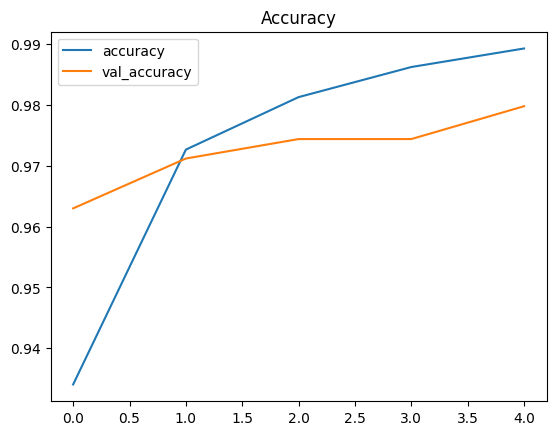

In [93]:
history=history.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')

## 清除記憶體

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)